In [1]:
%pwd

'/data/datnt3/text-normalization/data_storage'

In [1]:
from ctnx import num_to_words

print(num_to_words(2010))


hai nghìn không trăm mười


In [ ]:
#!REMOVE WRONG TAG GPT
import pandas as pd

file = "/data/datnt3/text-normalization/data_storage/processed/retagged_data_cleaned.csv"
file = pd.read_csv(file)



for _, row in file.iterrows():
  

In [19]:
from vinorm import TTSnorm
S=TTSnorm("tôi mua nhà từ 4/2020, vay ngân hàng khoảng 40%, theo dự kiến là khoảng tháng 6-7 cư dân về ở, hạ tầng xung quanh hoàn thiện, giá nhà sẽ tăng cao, lúc đó bán sẽ thu lời.")
print(S)


tôi mua nhà từ bốn , hai nghìn không trăm hai mươi , vay ngân hàng khoảng bốn mươi phần trăm , theo dự kiến là khoảng tháng sáu bảy cư dân về ở , hạ tầng xung quanh hoàn thiện , giá nhà sẽ tăng cao , lúc đó bán sẽ thu lời .. 


In [2]:
NSW_LIST = [
    "dmdmy",
    "ddmy",
    "dmdm",
    "dmydmy",
    "mymy",
    "dmy",
    "mmy",
    "qqy",
    "ddm",
    "qq",
    "dd",
    "mm",
    "yy",
    "my",
    "dm",
    "qy",
    "hmshms",
    "hmhm",
    "msms",
    "hms",
    "hh",
    "t_mm",
    "ss",
    "hm",
    "ms",
    "hour",
    "tel",
    "math_operator",
    "currency_range",
    "currency",
    "measure_range",
    "measure",
    "num_int",
    "num_int1",
    "num_float",
    "range",
    "roman",
    "roman_range",
    "score",
    "fraction",
    "ratio",
    "hour_measure",
    "num/num",
    "num-num",
    "num.num",
    "num:num"
]

In [3]:
import re

# Sắp xếp từ dài đến ngắn để ưu tiên loại dài hơn
NSW_LIST.sort(key=len, reverse=True)
nsw_pattern = "|".join(NSW_LIST)

# Regex khớp ~...#nsw_type
pattern = r"~(.*?)#(" + nsw_pattern + r")\b"
compiled_pattern = re.compile(pattern)
print(pattern)

# Test
# test_str = "theo kế hoạch, ~15#num_int tổ công tác ~141#num_int sẽ chốt trực từ ~22#num_inth đêm nay, ~30/1#num/num"
# matches = compiled_pattern.findall(test_str)
# print(matches)


~(.*?)#(currency_range|math_operator|measure_range|hour_measure|roman_range|num_float|currency|num_int1|fraction|measure|num_int|num/num|num-num|num.num|num:num|dmydmy|hmshms|dmdmy|range|roman|score|ratio|ddmy|dmdm|mymy|hmhm|msms|t_mm|hour|dmy|mmy|qqy|ddm|hms|tel|qq|dd|mm|yy|my|dm|qy|hh|ss|hm|ms)\b


In [3]:
len(NSW_LIST)

41

In [7]:
import pandas as pd

file = "/data/datnt3/text-normalization/data_storage/eval/llm_inference/2025-06-04/2025-05-30_vn-llama3.2-3b-enhanced-2025-05-30_eval.csv"
df = pd.read_csv(file)

true = 0
total = 0
for _, row in df.iterrows():
  total += 1
  if row["exact_match"] == 1:
    true += 1
    
print(true,total)
print(true/total)

457 1199
0.3811509591326105


In [8]:
prob_nsw_dict = {}

for _, row in df.iterrows():
    tag = row["test_tag"].strip()
    if tag not in prob_nsw_dict.keys():
      prob_nsw_dict[tag] = {"true": 0,
                            "total": 0}
    prob_nsw_dict[tag]["total"] += 1
    if row["exact_match"] == 1:
      prob_nsw_dict[tag]["true"] += 1


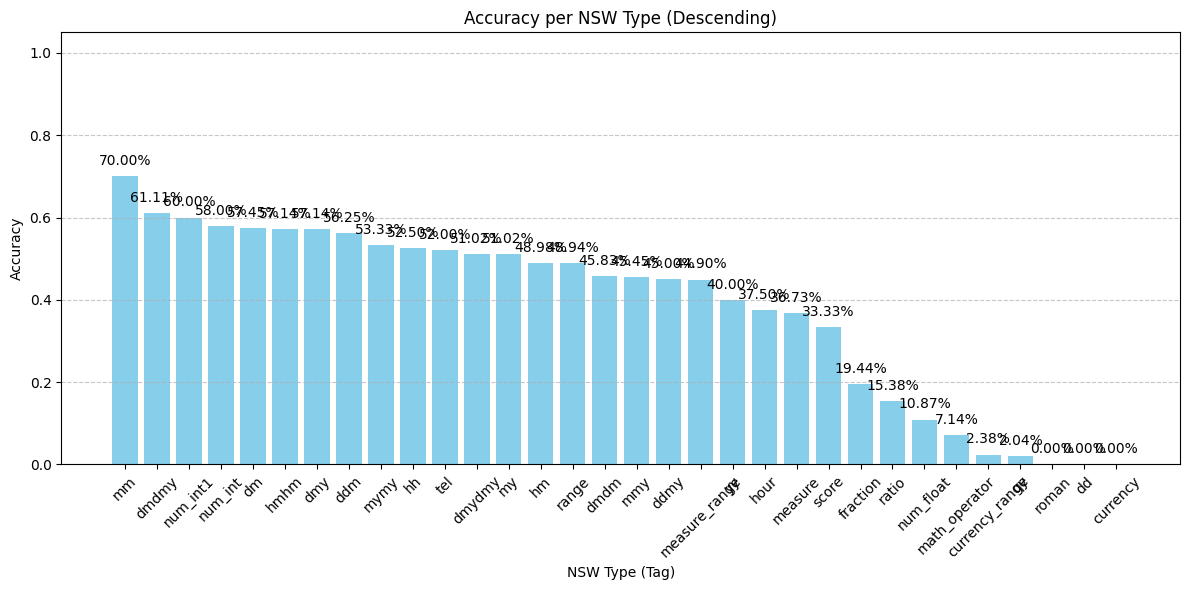

In [9]:
import matplotlib.pyplot as plt

# Compute accuracy for each tag
tag_accuracy = []
for tag, values in prob_nsw_dict.items():
    accuracy = values["true"] / values["total"] if values["total"] > 0 else 0
    tag_accuracy.append((tag, accuracy))

# Sort by descending accuracy
tag_accuracy.sort(key=lambda x: x[1], reverse=True)

# Unpack
tag_names, accuracies = zip(*tag_accuracy)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(tag_names, accuracies, color='skyblue')
plt.xlabel("NSW Type (Tag)")
plt.ylabel("Accuracy")
plt.title("Accuracy per NSW Type (Descending)")
plt.ylim(0, 1.05)

# Add percentage on top of bars
for bar, acc in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.02, f"{acc:.2%}", ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


442 1191
0.3711167086481948


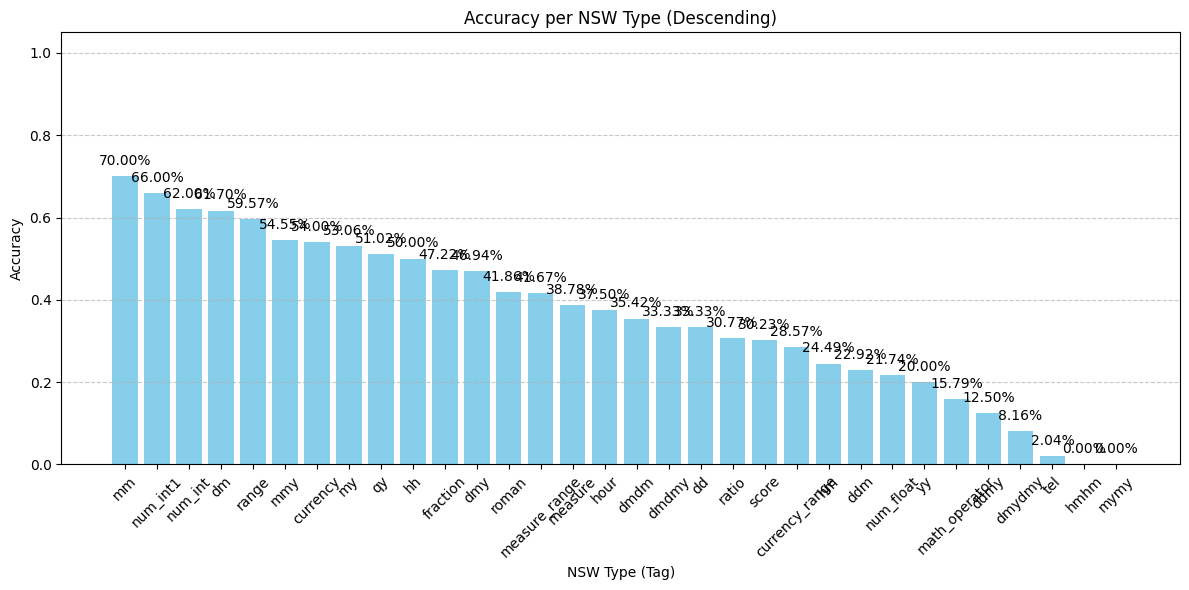

In [3]:
import pandas as pd

file = "/data/datnt3/text-normalization/data_storage/eval/llm_inference/2025-06-07/2025-05-26_vn-llama3.2-1b-finetuned-300k_eval.csv"
df = pd.read_csv(file)

true = 0
total = 0
for _, row in df.iterrows():
  total += 1
  if row["exact_match"] == 1:
    true += 1
    
print(true,total)
print(true/total)

prob_nsw_dict = {}

for _, row in df.iterrows():
    tag = row["test_tag"].strip()
    if tag not in prob_nsw_dict.keys():
      prob_nsw_dict[tag] = {"true": 0,
                            "total": 0}
    prob_nsw_dict[tag]["total"] += 1
    if row["exact_match"] == 1:
      prob_nsw_dict[tag]["true"] += 1
      
import matplotlib.pyplot as plt

# Compute accuracy for each tag
tag_accuracy = []
for tag, values in prob_nsw_dict.items():
    accuracy = values["true"] / values["total"] if values["total"] > 0 else 0
    tag_accuracy.append((tag, accuracy))

# Sort by descending accuracy
tag_accuracy.sort(key=lambda x: x[1], reverse=True)

# Unpack
tag_names, accuracies = zip(*tag_accuracy)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(tag_names, accuracies, color='skyblue')
plt.xlabel("NSW Type (Tag)")
plt.ylabel("Accuracy")
plt.title("Accuracy per NSW Type (Descending)")
plt.ylim(0, 1.05)

# Add percentage on top of bars
for bar, acc in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.02, f"{acc:.2%}", ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# baseline

557 1191
0.46767422334172964


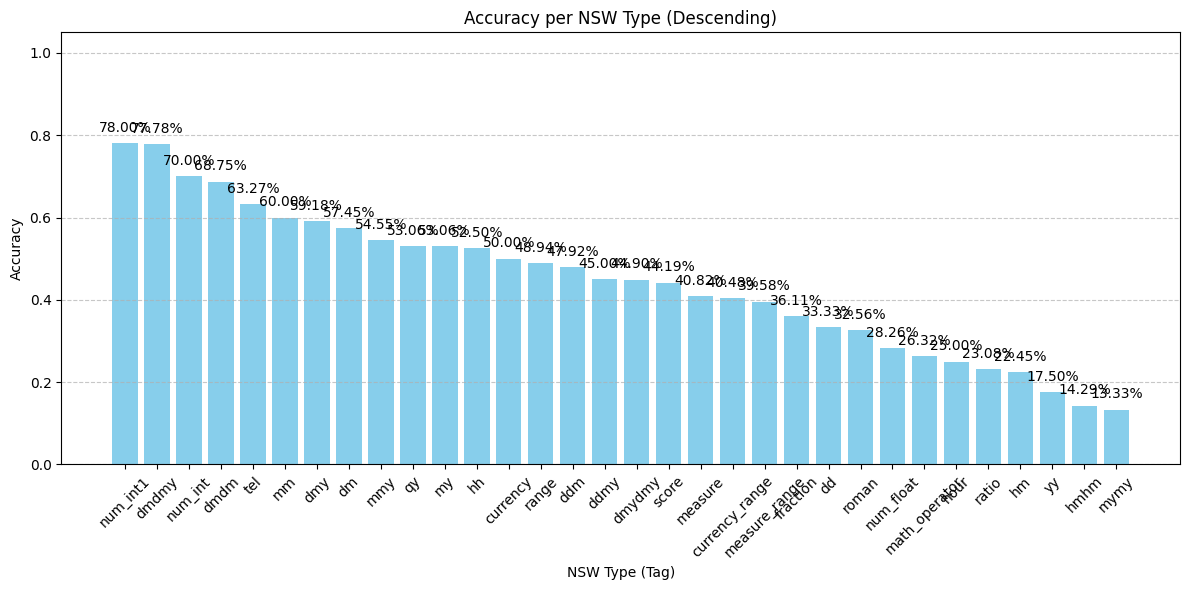

In [ ]:
import pandas as pd

file = "/data/datnt3/text-normalization/data_storage/eval/llm_inference/2025-06-07/2025-06-07_vn-llama3.2-1b-augmented-2025-06-07_eval.csv"
df = pd.read_csv(file)

true = 0
total = 0
for _, row in df.iterrows():
  total += 1
  if row["exact_match"] == 1:
    true += 1
    
print(true,total)
print(true/total)

prob_nsw_dict = {}

for _, row in df.iterrows():
    tag = row["test_tag"].strip()
    if tag not in prob_nsw_dict.keys():
      prob_nsw_dict[tag] = {"true": 0,
                            "total": 0}
    prob_nsw_dict[tag]["total"] += 1
    if row["exact_match"] == 1:
      prob_nsw_dict[tag]["true"] += 1
      
import matplotlib.pyplot as plt

# Compute accuracy for each tag
tag_accuracy = []
for tag, values in prob_nsw_dict.items():
    accuracy = values["true"] / values["total"] if values["total"] > 0 else 0
    tag_accuracy.append((tag, accuracy))

# Sort by descending accuracy
tag_accuracy.sort(key=lambda x: x[1], reverse=True)

# Unpack
tag_names, accuracies = zip(*tag_accuracy)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(tag_names, accuracies, color='skyblue')
plt.xlabel("NSW Type (Tag)")
plt.ylabel("Accuracy")
plt.title("Accuracy per NSW Type (Descending)")
plt.ylim(0, 1.05)

# Add percentage on top of bars
for bar, acc in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.02, f"{acc:.2%}", ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# baseline

557 1191
0.46767422334172964


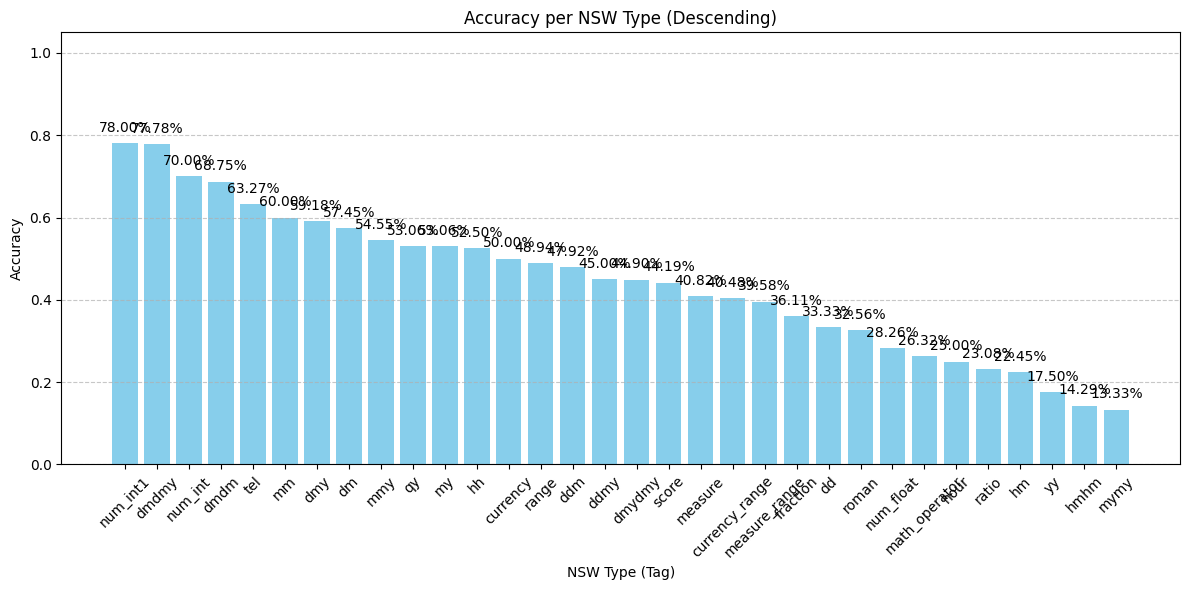

In [1]:
import pandas as pd

file = "/data/datnt3/text-normalization/data_storage/eval/llm_inference/2025-06-07/2025-06-07_vn-llama3.2-1b-augmented-2025-06-07_eval.csv"
df = pd.read_csv(file)

true = 0
total = 0
for _, row in df.iterrows():
  total += 1
  if row["exact_match"] == 1:
    true += 1
    
print(true,total)
print(true/total)

prob_nsw_dict = {}

for _, row in df.iterrows():
    tag = row["test_tag"].strip()
    if tag not in prob_nsw_dict.keys():
      prob_nsw_dict[tag] = {"true": 0,
                            "total": 0}
    prob_nsw_dict[tag]["total"] += 1
    if row["exact_match"] == 1:
      prob_nsw_dict[tag]["true"] += 1
      
import matplotlib.pyplot as plt

# Compute accuracy for each tag
tag_accuracy = []
for tag, values in prob_nsw_dict.items():
    accuracy = values["true"] / values["total"] if values["total"] > 0 else 0
    tag_accuracy.append((tag, accuracy))

# Sort by descending accuracy
tag_accuracy.sort(key=lambda x: x[1], reverse=True)

# Unpack
tag_names, accuracies = zip(*tag_accuracy)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(tag_names, accuracies, color='skyblue')
plt.xlabel("NSW Type (Tag)")
plt.ylabel("Accuracy")
plt.title("Accuracy per NSW Type (Descending)")
plt.ylim(0, 1.05)

# Add percentage on top of bars
for bar, acc in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.02, f"{acc:.2%}", ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# baseline

890 1191
0.7472712006717045


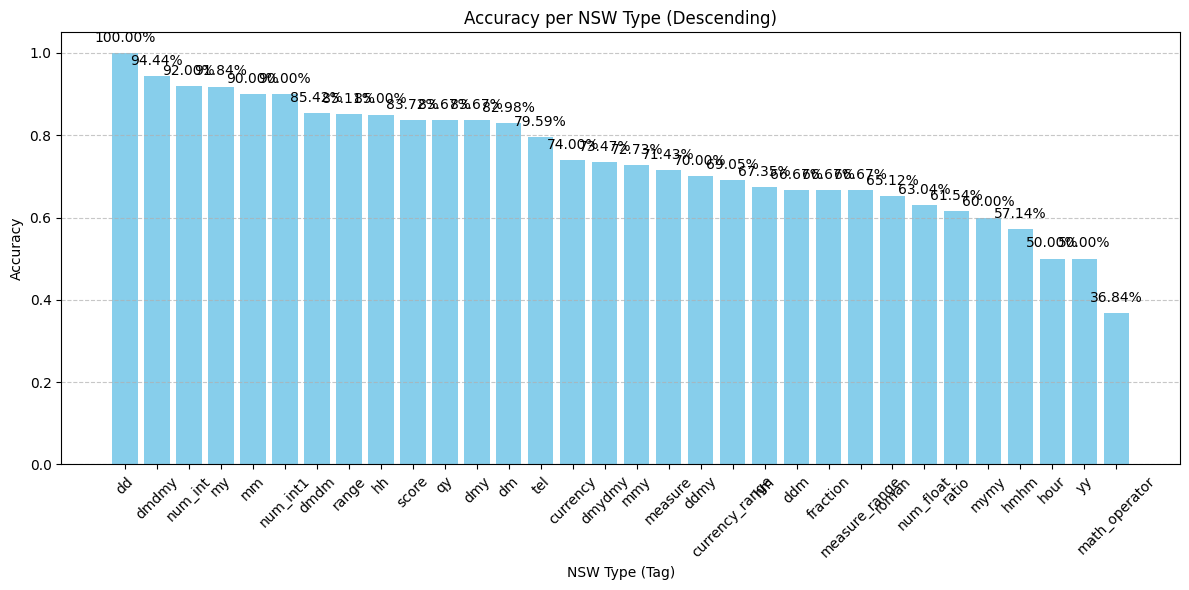

In [2]:
import pandas as pd

file = "/data/datnt3/text-normalization/data_storage/eval/llm_inference/2025-06-07/2025-06-07_vn-llama3.2-1b-augmented-2025-06-07_5_eval.csv"
df = pd.read_csv(file)

true = 0
total = 0
for _, row in df.iterrows():
  total += 1
  if row["exact_match"] == 1:
    true += 1
    
print(true,total)
print(true/total)

prob_nsw_dict = {}

for _, row in df.iterrows():
    tag = row["test_tag"].strip()
    if tag not in prob_nsw_dict.keys():
      prob_nsw_dict[tag] = {"true": 0,
                            "total": 0}
    prob_nsw_dict[tag]["total"] += 1
    if row["exact_match"] == 1:
      prob_nsw_dict[tag]["true"] += 1
      
import matplotlib.pyplot as plt

# Compute accuracy for each tag
tag_accuracy = []
for tag, values in prob_nsw_dict.items():
    accuracy = values["true"] / values["total"] if values["total"] > 0 else 0
    tag_accuracy.append((tag, accuracy))

# Sort by descending accuracy
tag_accuracy.sort(key=lambda x: x[1], reverse=True)

# Unpack
tag_names, accuracies = zip(*tag_accuracy)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(tag_names, accuracies, color='skyblue')
plt.xlabel("NSW Type (Tag)")
plt.ylabel("Accuracy")
plt.title("Accuracy per NSW Type (Descending)")
plt.ylim(0, 1.05)

# Add percentage on top of bars
for bar, acc in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.02, f"{acc:.2%}", ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# baseline

987 1191
0.8287153652392947


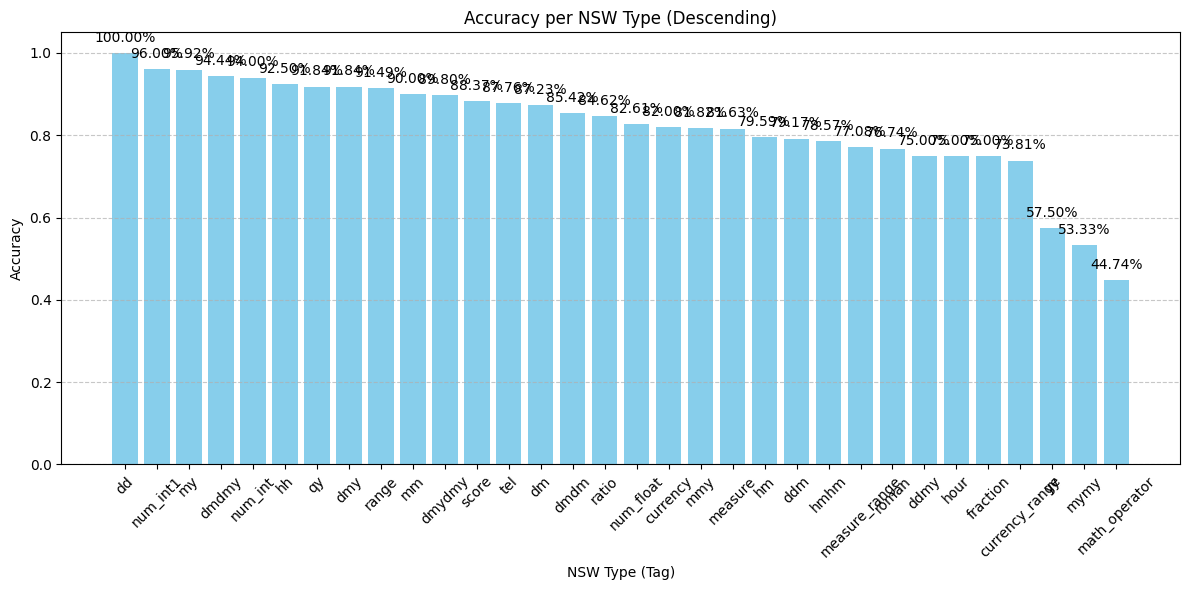

In [3]:
import pandas as pd

file = "/data/datnt3/text-normalization/data_storage/eval/llm_inference/2025-06-07/2025-06-07_vn-llama3.2-1b-augmented-2025-06-07_10_eval.csv"
df = pd.read_csv(file)

true = 0
total = 0
for _, row in df.iterrows():
  total += 1
  if row["exact_match"] == 1:
    true += 1
    
print(true,total)
print(true/total)

prob_nsw_dict = {}

for _, row in df.iterrows():
    tag = row["test_tag"].strip()
    if tag not in prob_nsw_dict.keys():
      prob_nsw_dict[tag] = {"true": 0,
                            "total": 0}
    prob_nsw_dict[tag]["total"] += 1
    if row["exact_match"] == 1:
      prob_nsw_dict[tag]["true"] += 1
      
import matplotlib.pyplot as plt

# Compute accuracy for each tag
tag_accuracy = []
for tag, values in prob_nsw_dict.items():
    accuracy = values["true"] / values["total"] if values["total"] > 0 else 0
    tag_accuracy.append((tag, accuracy))

# Sort by descending accuracy
tag_accuracy.sort(key=lambda x: x[1], reverse=True)

# Unpack
tag_names, accuracies = zip(*tag_accuracy)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(tag_names, accuracies, color='skyblue')
plt.xlabel("NSW Type (Tag)")
plt.ylabel("Accuracy")
plt.title("Accuracy per NSW Type (Descending)")
plt.ylim(0, 1.05)

# Add percentage on top of bars
for bar, acc in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.02, f"{acc:.2%}", ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# baseline

724 1191
0.6078925272879933


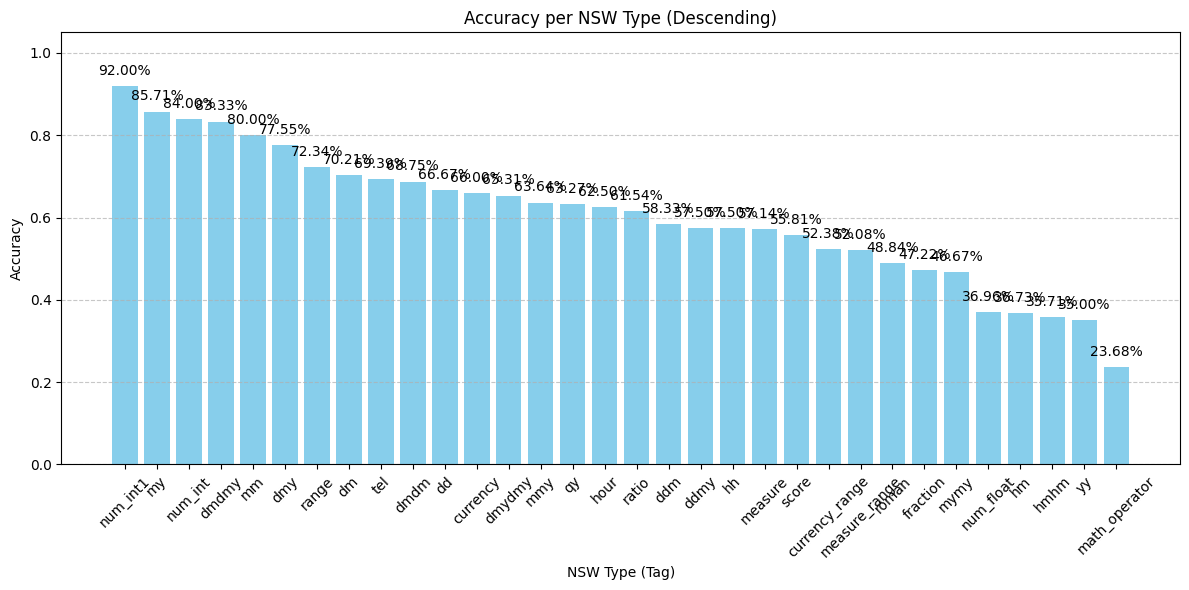

In [1]:
import pandas as pd

file = "/data/datnt3/text-normalization/data_storage/eval/llm_inference/2025-06-08/2025-06-07_vn-llama3.2-1b-augmented-2025-06-07_2_eval.csv"
df = pd.read_csv(file)

true = 0
total = 0
for _, row in df.iterrows():
  total += 1
  if row["exact_match"] == 1:
    true += 1
    
print(true,total)
print(true/total)

prob_nsw_dict = {}

for _, row in df.iterrows():
    tag = row["test_tag"].strip()
    if tag not in prob_nsw_dict.keys():
      prob_nsw_dict[tag] = {"true": 0,
                            "total": 0}
    prob_nsw_dict[tag]["total"] += 1
    if row["exact_match"] == 1:
      prob_nsw_dict[tag]["true"] += 1
      
import matplotlib.pyplot as plt

# Compute accuracy for each tag
tag_accuracy = []
for tag, values in prob_nsw_dict.items():
    accuracy = values["true"] / values["total"] if values["total"] > 0 else 0
    tag_accuracy.append((tag, accuracy))

# Sort by descending accuracy
tag_accuracy.sort(key=lambda x: x[1], reverse=True)

# Unpack
tag_names, accuracies = zip(*tag_accuracy)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(tag_names, accuracies, color='skyblue')
plt.xlabel("NSW Type (Tag)")
plt.ylabel("Accuracy")
plt.title("Accuracy per NSW Type (Descending)")
plt.ylim(0, 1.05)

# Add percentage on top of bars
for bar, acc in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.02, f"{acc:.2%}", ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# baseline

806 1191
0.6767422334172963


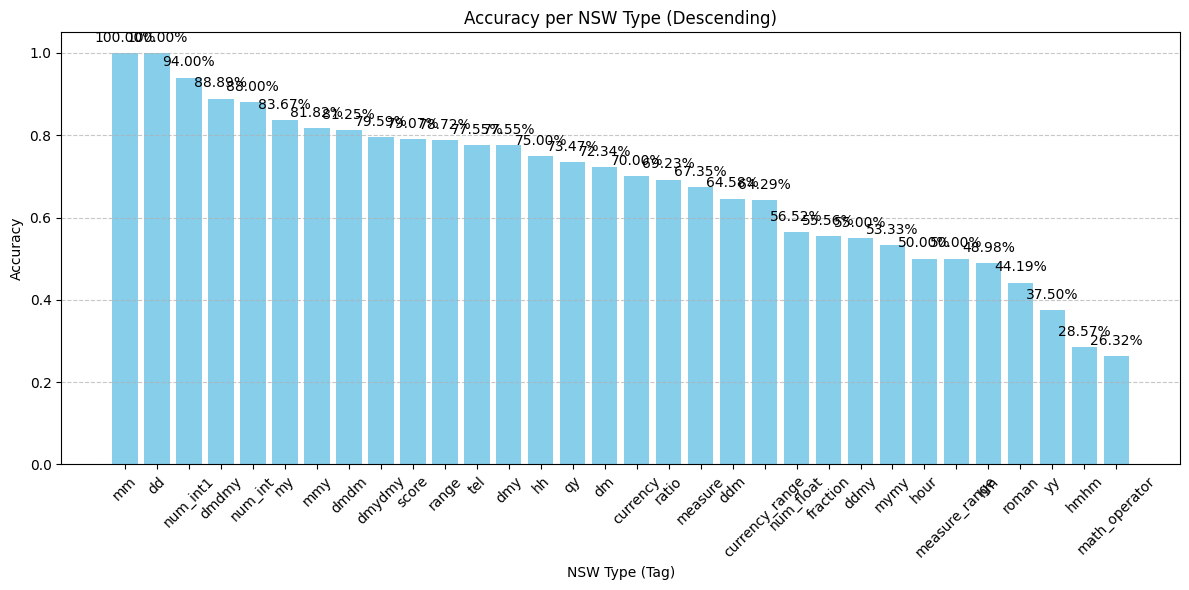

In [2]:
import pandas as pd

file = "/data/datnt3/text-normalization/data_storage/eval/llm_inference/2025-06-08/2025-06-07_vn-llama3.2-1b-augmented-2025-06-07_3_eval.csv"
df = pd.read_csv(file)

true = 0
total = 0
for _, row in df.iterrows():
  total += 1
  if row["exact_match"] == 1:
    true += 1
    
print(true,total)
print(true/total)

prob_nsw_dict = {}

for _, row in df.iterrows():
    tag = row["test_tag"].strip()
    if tag not in prob_nsw_dict.keys():
      prob_nsw_dict[tag] = {"true": 0,
                            "total": 0}
    prob_nsw_dict[tag]["total"] += 1
    if row["exact_match"] == 1:
      prob_nsw_dict[tag]["true"] += 1
      
import matplotlib.pyplot as plt

# Compute accuracy for each tag
tag_accuracy = []
for tag, values in prob_nsw_dict.items():
    accuracy = values["true"] / values["total"] if values["total"] > 0 else 0
    tag_accuracy.append((tag, accuracy))

# Sort by descending accuracy
tag_accuracy.sort(key=lambda x: x[1], reverse=True)

# Unpack
tag_names, accuracies = zip(*tag_accuracy)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(tag_names, accuracies, color='skyblue')
plt.xlabel("NSW Type (Tag)")
plt.ylabel("Accuracy")
plt.title("Accuracy per NSW Type (Descending)")
plt.ylim(0, 1.05)

# Add percentage on top of bars
for bar, acc in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.02, f"{acc:.2%}", ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# baseline

667 1191
0.5600335852225021


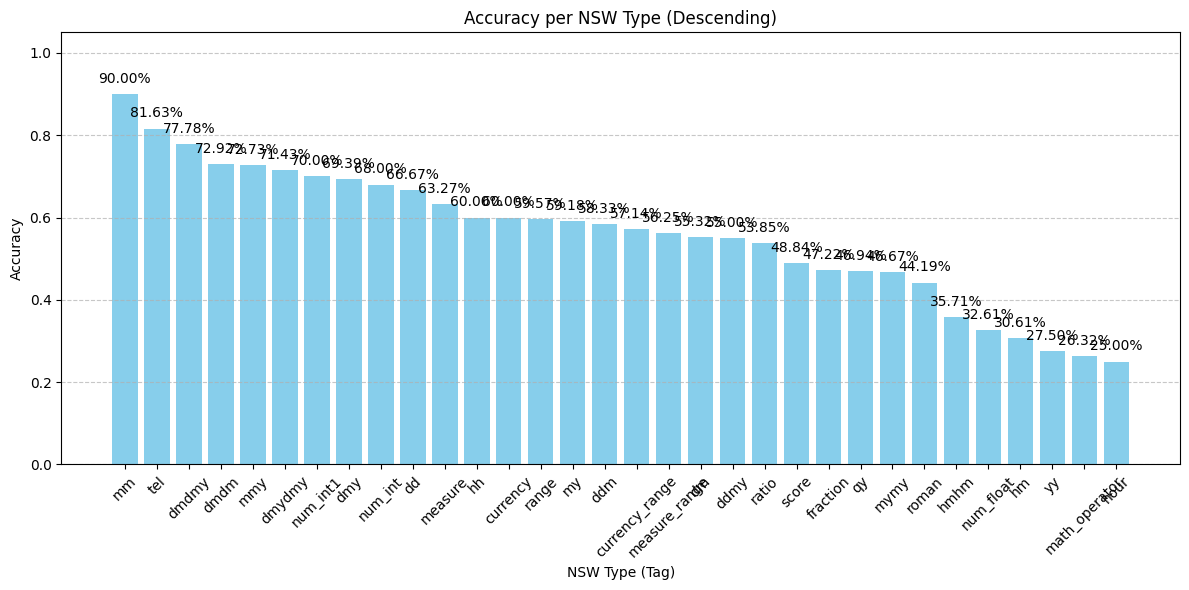

In [1]:
import pandas as pd

file = "/data/datnt3/text-normalization/data_storage/eval/llm_inference/2025-06-08/2025-06-07_vn-llama3.2-3b-augmented-2025-06-07_1_eval.csv"
df = pd.read_csv(file)

true = 0
total = 0
for _, row in df.iterrows():
  total += 1
  if row["exact_match"] == 1:
    true += 1
    
print(true,total)
print(true/total)

prob_nsw_dict = {}

for _, row in df.iterrows():
    tag = row["test_tag"].strip()
    if tag not in prob_nsw_dict.keys():
      prob_nsw_dict[tag] = {"true": 0,
                            "total": 0}
    prob_nsw_dict[tag]["total"] += 1
    if row["exact_match"] == 1:
      prob_nsw_dict[tag]["true"] += 1
      
import matplotlib.pyplot as plt

# Compute accuracy for each tag
tag_accuracy = []
for tag, values in prob_nsw_dict.items():
    accuracy = values["true"] / values["total"] if values["total"] > 0 else 0
    tag_accuracy.append((tag, accuracy))

# Sort by descending accuracy
tag_accuracy.sort(key=lambda x: x[1], reverse=True)

# Unpack
tag_names, accuracies = zip(*tag_accuracy)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(tag_names, accuracies, color='skyblue')
plt.xlabel("NSW Type (Tag)")
plt.ylabel("Accuracy")
plt.title("Accuracy per NSW Type (Descending)")
plt.ylim(0, 1.05)

# Add percentage on top of bars
for bar, acc in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.02, f"{acc:.2%}", ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# baseline

778 1191
0.653232577665827


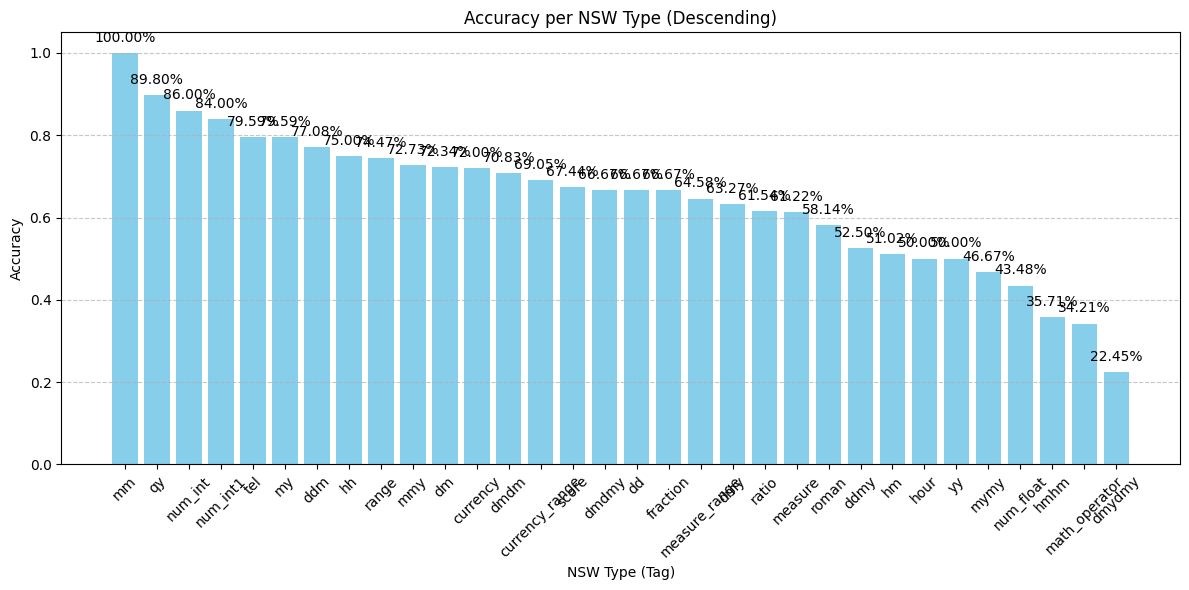

In [2]:
import pandas as pd

file = "/data/datnt3/text-normalization/data_storage/eval/llm_inference/2025-06-08/2025-06-07_vn-qwen2.5-3b-augmented-2025-06-07_1_eval.csv"
df = pd.read_csv(file)

true = 0
total = 0
for _, row in df.iterrows():
  total += 1
  if row["exact_match"] == 1:
    true += 1
    
print(true,total)
print(true/total)

prob_nsw_dict = {}

for _, row in df.iterrows():
    tag = row["test_tag"].strip()
    if tag not in prob_nsw_dict.keys():
      prob_nsw_dict[tag] = {"true": 0,
                            "total": 0}
    prob_nsw_dict[tag]["total"] += 1
    if row["exact_match"] == 1:
      prob_nsw_dict[tag]["true"] += 1
      
import matplotlib.pyplot as plt

# Compute accuracy for each tag
tag_accuracy = []
for tag, values in prob_nsw_dict.items():
    accuracy = values["true"] / values["total"] if values["total"] > 0 else 0
    tag_accuracy.append((tag, accuracy))

# Sort by descending accuracy
tag_accuracy.sort(key=lambda x: x[1], reverse=True)

# Unpack
tag_names, accuracies = zip(*tag_accuracy)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(tag_names, accuracies, color='skyblue')
plt.xlabel("NSW Type (Tag)")
plt.ylabel("Accuracy")
plt.title("Accuracy per NSW Type (Descending)")
plt.ylim(0, 1.05)

# Add percentage on top of bars
for bar, acc in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.02, f"{acc:.2%}", ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# baseline

800 1191
0.6717044500419815


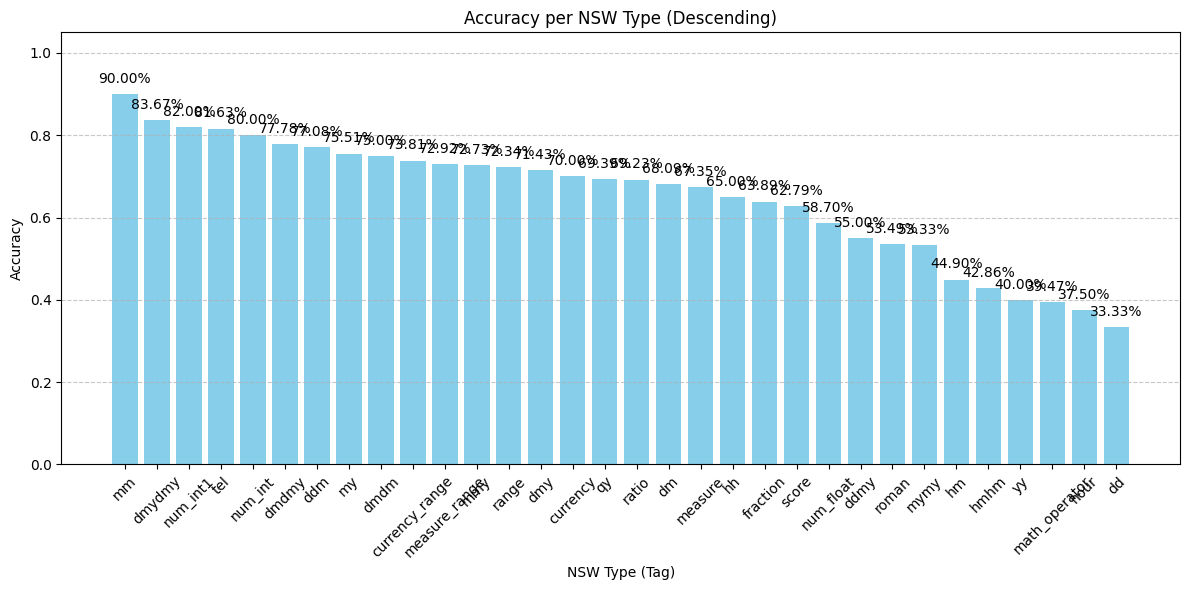

In [2]:
import pandas as pd

file = "/data/datnt3/text-normalization/data_storage/eval/llm_inference/2025-06-08/2025-06-07_vn-llama3.2-3b-augmented-2025-06-07_2_eval.csv"
df = pd.read_csv(file)

true = 0
total = 0
for _, row in df.iterrows():
  total += 1
  if row["exact_match"] == 1:
    true += 1
    
print(true,total)
print(true/total)

prob_nsw_dict = {}

for _, row in df.iterrows():
    tag = row["test_tag"].strip()
    if tag not in prob_nsw_dict.keys():
      prob_nsw_dict[tag] = {"true": 0,
                            "total": 0}
    prob_nsw_dict[tag]["total"] += 1
    if row["exact_match"] == 1:
      prob_nsw_dict[tag]["true"] += 1
      
import matplotlib.pyplot as plt

# Compute accuracy for each tag
tag_accuracy = []
for tag, values in prob_nsw_dict.items():
    accuracy = values["true"] / values["total"] if values["total"] > 0 else 0
    tag_accuracy.append((tag, accuracy))

# Sort by descending accuracy
tag_accuracy.sort(key=lambda x: x[1], reverse=True)

# Unpack
tag_names, accuracies = zip(*tag_accuracy)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(tag_names, accuracies, color='skyblue')
plt.xlabel("NSW Type (Tag)")
plt.ylabel("Accuracy")
plt.title("Accuracy per NSW Type (Descending)")
plt.ylim(0, 1.05)

# Add percentage on top of bars
for bar, acc in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.02, f"{acc:.2%}", ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# baseline

586 950
0.6168421052631579


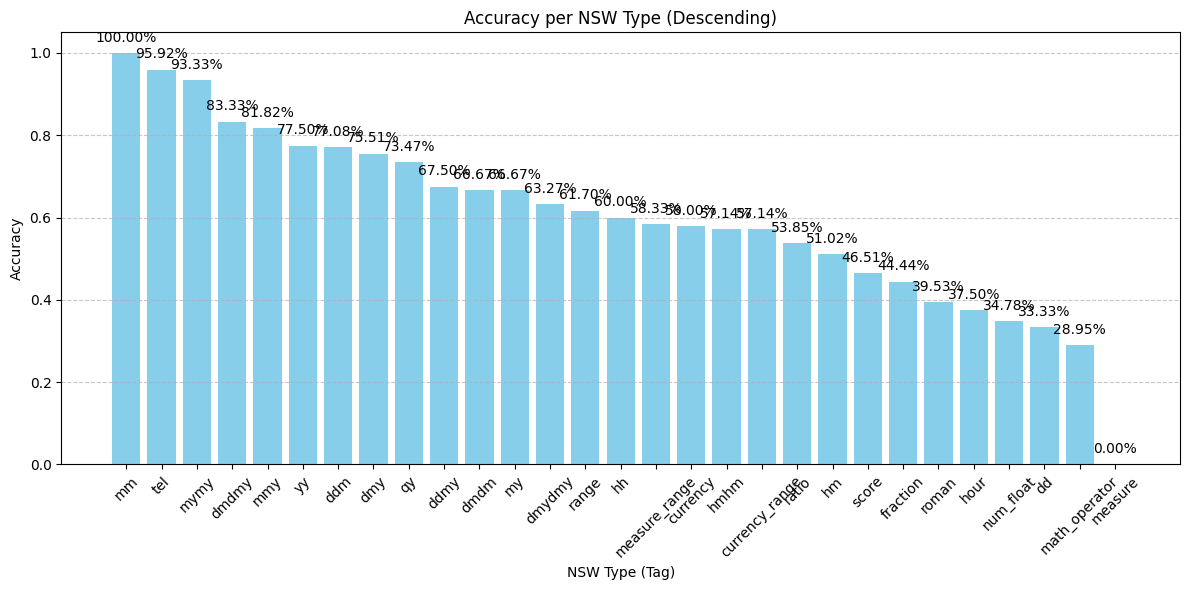

In [3]:
import pandas as pd

file = "/data/datnt3/text-normalization/data_storage/eval/hybrid_inference/2025-06-08/2025-06-07_vn-llama3.2-3b-augmented-2025-06-07_1_eval.csv"
df = pd.read_csv(file)

true = 0
total = 0
for _, row in df.iterrows():
  total += 1
  if row["exact_match"] == 1:
    true += 1
    
print(true,total)
print(true/total)

prob_nsw_dict = {}

for _, row in df.iterrows():
    tag = row["test_tag"].strip()
    if tag not in prob_nsw_dict.keys():
      prob_nsw_dict[tag] = {"true": 0,
                            "total": 0}
    prob_nsw_dict[tag]["total"] += 1
    if row["exact_match"] == 1:
      prob_nsw_dict[tag]["true"] += 1
      
import matplotlib.pyplot as plt

# Compute accuracy for each tag
tag_accuracy = []
for tag, values in prob_nsw_dict.items():
    accuracy = values["true"] / values["total"] if values["total"] > 0 else 0
    tag_accuracy.append((tag, accuracy))

# Sort by descending accuracy
tag_accuracy.sort(key=lambda x: x[1], reverse=True)

# Unpack
tag_names, accuracies = zip(*tag_accuracy)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(tag_names, accuracies, color='skyblue')
plt.xlabel("NSW Type (Tag)")
plt.ylabel("Accuracy")
plt.title("Accuracy per NSW Type (Descending)")
plt.ylim(0, 1.05)

# Add percentage on top of bars
for bar, acc in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.02, f"{acc:.2%}", ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# baseline

534 1191
0.44836272040302266


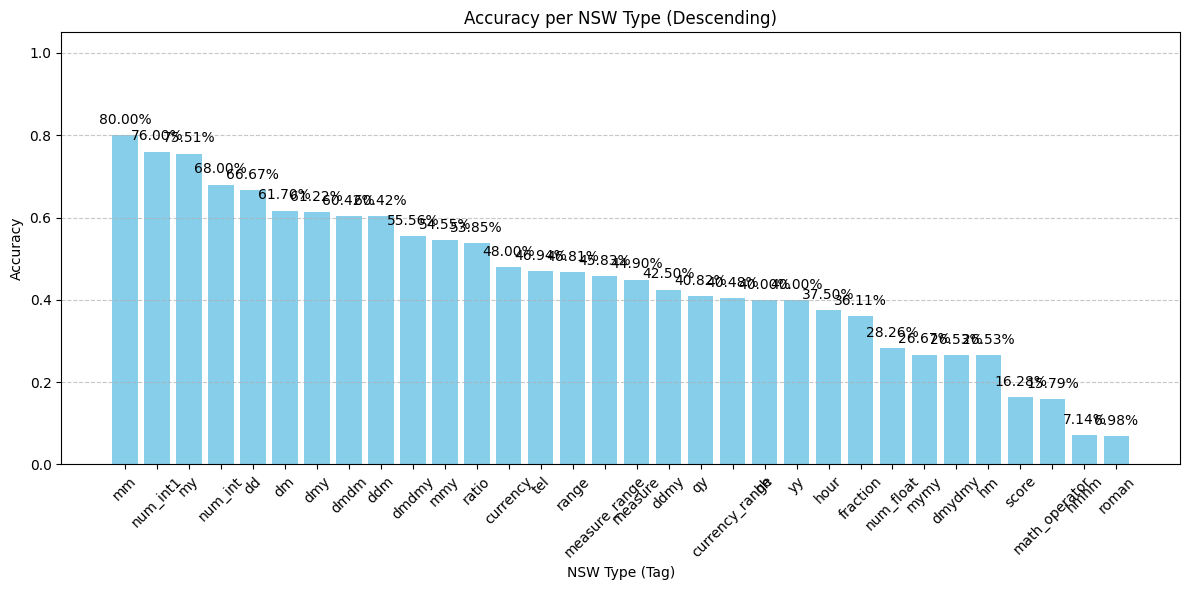

In [3]:
import pandas as pd

file = "/data/datnt3/text-normalization/data_storage/eval/llm_inference/2025-06-06/content_vn-llama3.2-3b-finetuned-300k-16k_eval.csv"
df = pd.read_csv(file)

true = 0
total = 0
for _, row in df.iterrows():
  total += 1
  if row["exact_match"] == 1:
    true += 1
    
print(true,total)
print(true/total)

prob_nsw_dict = {}

for _, row in df.iterrows():
    tag = row["test_tag"].strip()
    if tag not in prob_nsw_dict.keys():
      prob_nsw_dict[tag] = {"true": 0,
                            "total": 0}
    prob_nsw_dict[tag]["total"] += 1
    if row["exact_match"] == 1:
      prob_nsw_dict[tag]["true"] += 1
      
import matplotlib.pyplot as plt

# Compute accuracy for each tag
tag_accuracy = []
for tag, values in prob_nsw_dict.items():
    accuracy = values["true"] / values["total"] if values["total"] > 0 else 0
    tag_accuracy.append((tag, accuracy))

# Sort by descending accuracy
tag_accuracy.sort(key=lambda x: x[1], reverse=True)

# Unpack
tag_names, accuracies = zip(*tag_accuracy)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(tag_names, accuracies, color='skyblue')
plt.xlabel("NSW Type (Tag)")
plt.ylabel("Accuracy")
plt.title("Accuracy per NSW Type (Descending)")
plt.ylim(0, 1.05)

# Add percentage on top of bars
for bar, acc in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.02, f"{acc:.2%}", ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



577 1191
0.48446683459277917


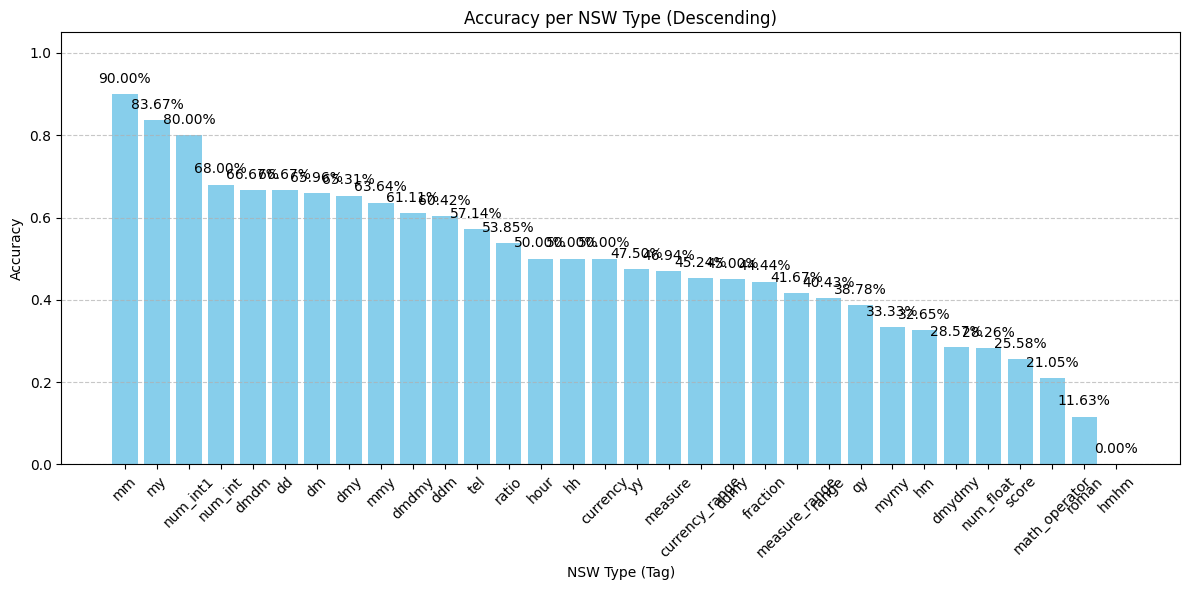

In [4]:
import pandas as pd

file = "/data/datnt3/text-normalization/data_storage/eval/llm_inference/2025-06-07/vn-llama3.2-3b-finetuned-300k-16k-30step_vn-llama3.2-3b-finetuned-300k-16k-30step_eval.csv"
df = pd.read_csv(file)

true = 0
total = 0
for _, row in df.iterrows():
  total += 1
  if row["exact_match"] == 1:
    true += 1
    
print(true,total)
print(true/total)

prob_nsw_dict = {}

for _, row in df.iterrows():
    tag = row["test_tag"].strip()
    if tag not in prob_nsw_dict.keys():
      prob_nsw_dict[tag] = {"true": 0,
                            "total": 0}
    prob_nsw_dict[tag]["total"] += 1
    if row["exact_match"] == 1:
      prob_nsw_dict[tag]["true"] += 1
      
import matplotlib.pyplot as plt

# Compute accuracy for each tag
tag_accuracy = []
for tag, values in prob_nsw_dict.items():
    accuracy = values["true"] / values["total"] if values["total"] > 0 else 0
    tag_accuracy.append((tag, accuracy))

# Sort by descending accuracy
tag_accuracy.sort(key=lambda x: x[1], reverse=True)

# Unpack
tag_names, accuracies = zip(*tag_accuracy)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(tag_names, accuracies, color='skyblue')
plt.xlabel("NSW Type (Tag)")
plt.ylabel("Accuracy")
plt.title("Accuracy per NSW Type (Descending)")
plt.ylim(0, 1.05)

# Add percentage on top of bars
for bar, acc in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.02, f"{acc:.2%}", ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



555 1191
0.4659949622166247


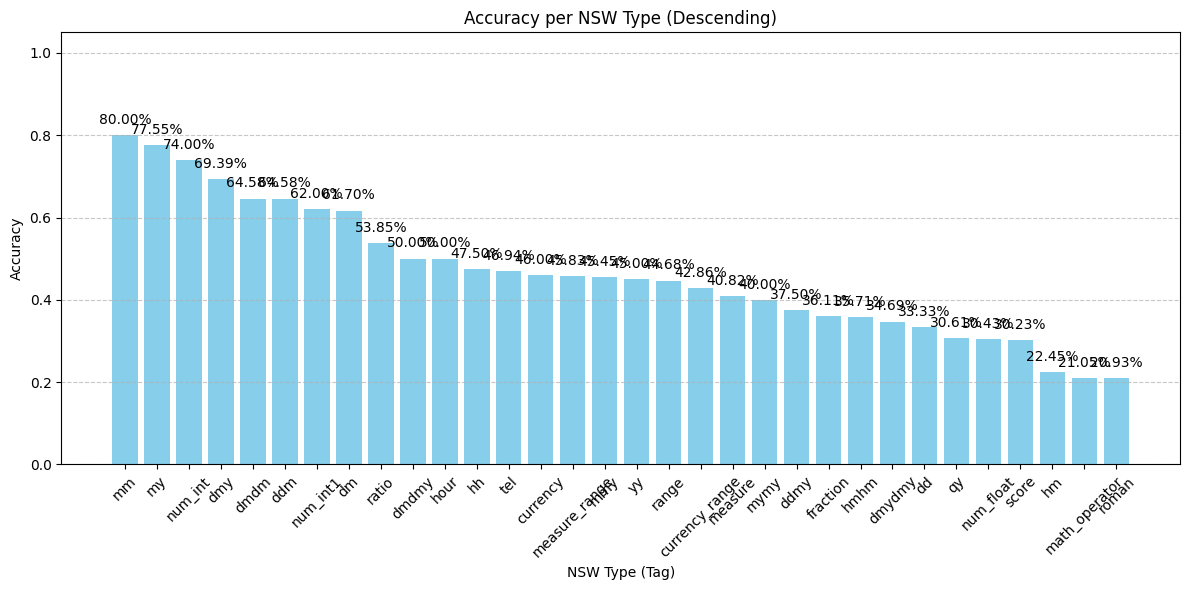

In [5]:
import pandas as pd

file = "/data/datnt3/text-normalization/data_storage/eval/llm_inference/2025-06-07/content_vn-llama3.2-3b-finetuned-300k-16k-20steps_eval.csv"
df = pd.read_csv(file)

true = 0
total = 0
for _, row in df.iterrows():
  total += 1
  if row["exact_match"] == 1:
    true += 1
    
print(true,total)
print(true/total)

prob_nsw_dict = {}

for _, row in df.iterrows():
    tag = row["test_tag"].strip()
    if tag not in prob_nsw_dict.keys():
      prob_nsw_dict[tag] = {"true": 0,
                            "total": 0}
    prob_nsw_dict[tag]["total"] += 1
    if row["exact_match"] == 1:
      prob_nsw_dict[tag]["true"] += 1
      
import matplotlib.pyplot as plt

# Compute accuracy for each tag
tag_accuracy = []
for tag, values in prob_nsw_dict.items():
    accuracy = values["true"] / values["total"] if values["total"] > 0 else 0
    tag_accuracy.append((tag, accuracy))

# Sort by descending accuracy
tag_accuracy.sort(key=lambda x: x[1], reverse=True)

# Unpack
tag_names, accuracies = zip(*tag_accuracy)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(tag_names, accuracies, color='skyblue')
plt.xlabel("NSW Type (Tag)")
plt.ylabel("Accuracy")
plt.title("Accuracy per NSW Type (Descending)")
plt.ylim(0, 1.05)

# Add percentage on top of bars
for bar, acc in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.02, f"{acc:.2%}", ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



545 1191
0.45759865659109994


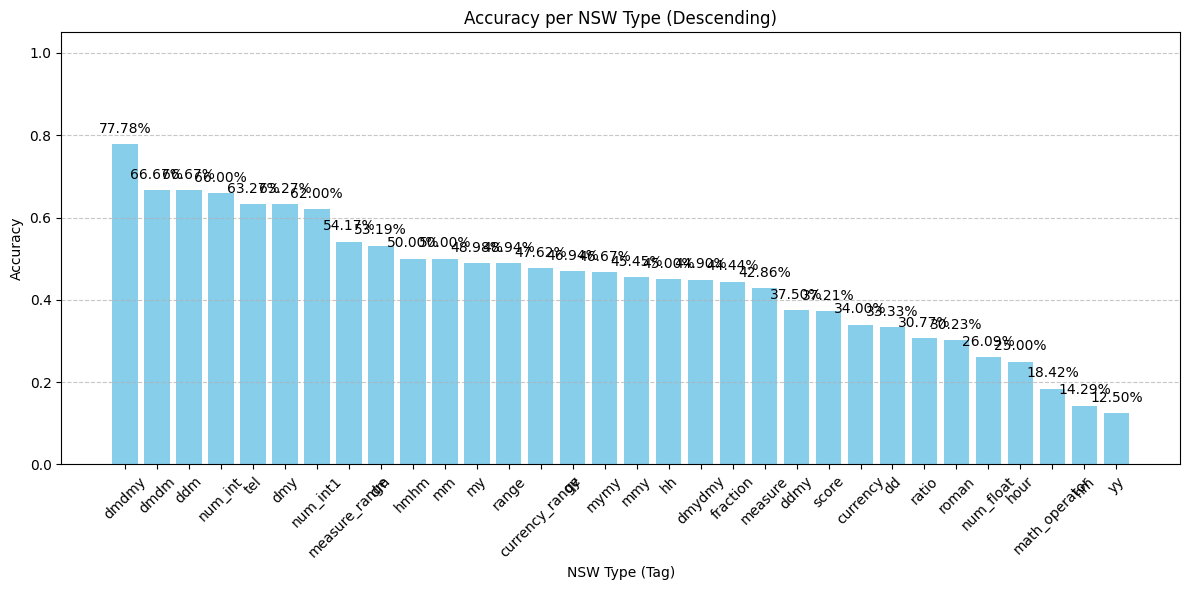

In [6]:
import pandas as pd

file = "/data/datnt3/text-normalization/data_storage/eval/multimodel_inference/2025-06-07/2025-05-30_vn-llama3.2-3b-enhanced-2025-05-30_eval.csv"
df = pd.read_csv(file)

true = 0
total = 0
for _, row in df.iterrows():
  total += 1
  if row["exact_match"] == 1:
    true += 1
    
print(true,total)
print(true/total)

prob_nsw_dict = {}

for _, row in df.iterrows():
    tag = row["test_tag"].strip()
    if tag not in prob_nsw_dict.keys():
      prob_nsw_dict[tag] = {"true": 0,
                            "total": 0}
    prob_nsw_dict[tag]["total"] += 1
    if row["exact_match"] == 1:
      prob_nsw_dict[tag]["true"] += 1
      
import matplotlib.pyplot as plt

# Compute accuracy for each tag
tag_accuracy = []
for tag, values in prob_nsw_dict.items():
    accuracy = values["true"] / values["total"] if values["total"] > 0 else 0
    tag_accuracy.append((tag, accuracy))

# Sort by descending accuracy
tag_accuracy.sort(key=lambda x: x[1], reverse=True)

# Unpack
tag_names, accuracies = zip(*tag_accuracy)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(tag_names, accuracies, color='skyblue')
plt.xlabel("NSW Type (Tag)")
plt.ylabel("Accuracy")
plt.title("Accuracy per NSW Type (Descending)")
plt.ylim(0, 1.05)

# Add percentage on top of bars
for bar, acc in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.02, f"{acc:.2%}", ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



470 1191
0.39462636439966414


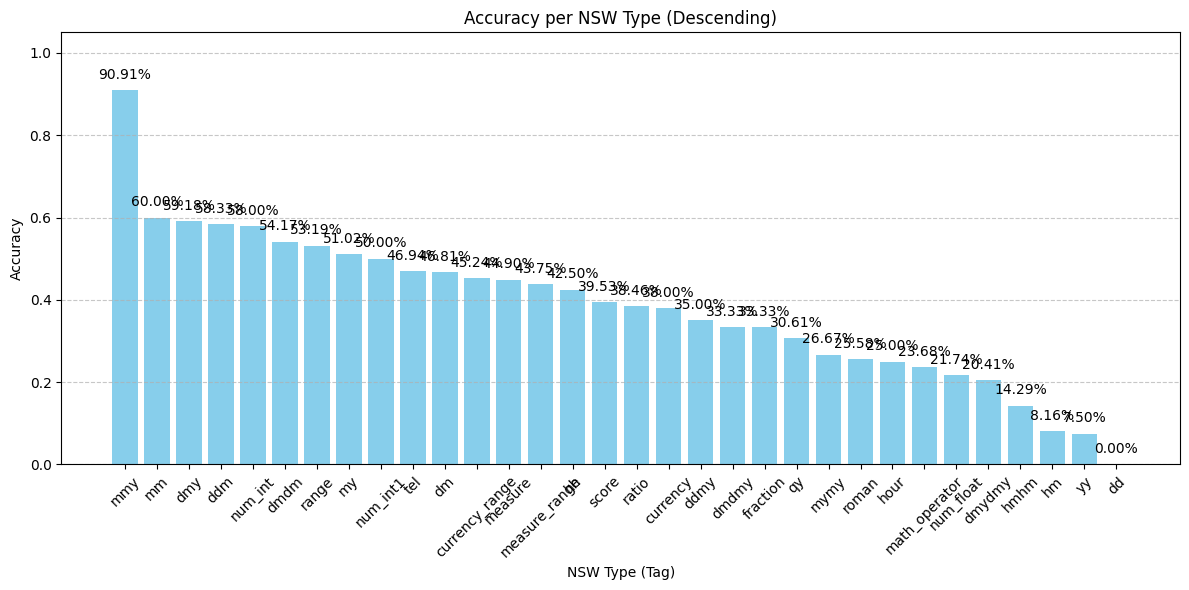

In [7]:
import pandas as pd

file = "/data/datnt3/text-normalization/data_storage/eval/multimodel_inference/2025-06-07/vn-llama3.2-3b-finetuned-300k-16k-30step_vn-llama3.2-3b-finetuned-300k-16k-30step_eval.csv"
df = pd.read_csv(file)

true = 0
total = 0
for _, row in df.iterrows():
  total += 1
  if row["exact_match"] == 1:
    true += 1
    
print(true,total)
print(true/total)

prob_nsw_dict = {}

for _, row in df.iterrows():
    tag = row["test_tag"].strip()
    if tag not in prob_nsw_dict.keys():
      prob_nsw_dict[tag] = {"true": 0,
                            "total": 0}
    prob_nsw_dict[tag]["total"] += 1
    if row["exact_match"] == 1:
      prob_nsw_dict[tag]["true"] += 1
      
import matplotlib.pyplot as plt

# Compute accuracy for each tag
tag_accuracy = []
for tag, values in prob_nsw_dict.items():
    accuracy = values["true"] / values["total"] if values["total"] > 0 else 0
    tag_accuracy.append((tag, accuracy))

# Sort by descending accuracy
tag_accuracy.sort(key=lambda x: x[1], reverse=True)

# Unpack
tag_names, accuracies = zip(*tag_accuracy)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(tag_names, accuracies, color='skyblue')
plt.xlabel("NSW Type (Tag)")
plt.ylabel("Accuracy")
plt.title("Accuracy per NSW Type (Descending)")
plt.ylim(0, 1.05)

# Add percentage on top of bars
for bar, acc in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.02, f"{acc:.2%}", ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



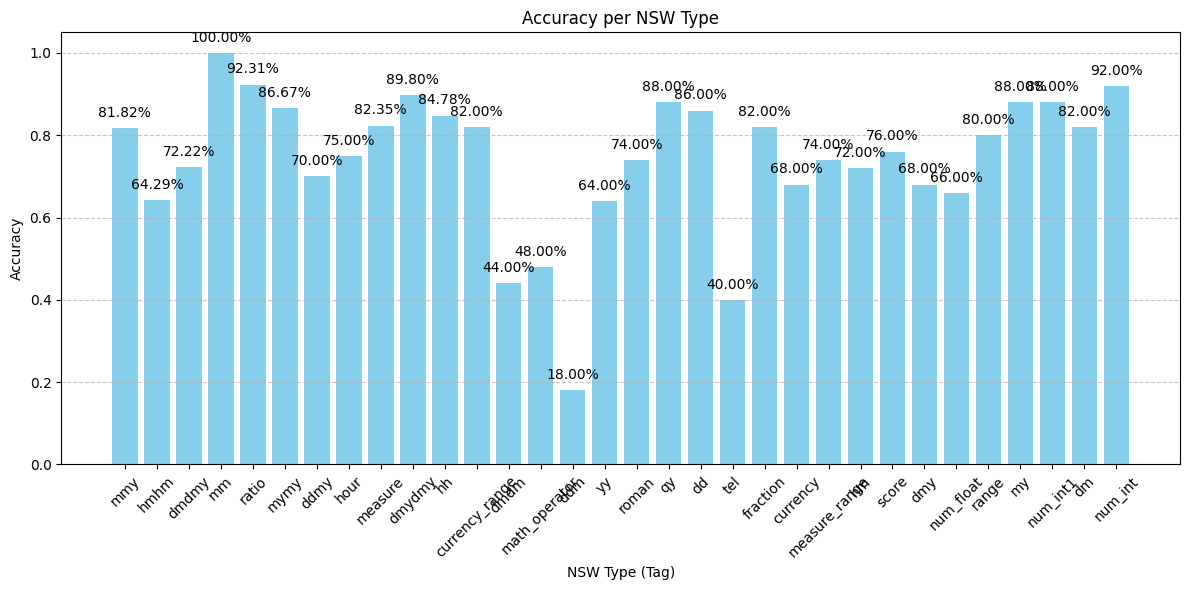

In [4]:
import matplotlib.pyplot as plt

# Calculate accuracy for each NSW type
tag_names = []
accuracies = []

for tag, values in prob_nsw_dict.items():
    accuracy = values["true"] / values["total"] if values["total"] > 0 else 0
    tag_names.append(tag)
    accuracies.append(accuracy)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(tag_names, accuracies, color='skyblue')
plt.xlabel("NSW Type (Tag)")
plt.ylabel("Accuracy")
plt.title("Accuracy per NSW Type")
plt.ylim(0, 1.05)

# Add percentage on top of bars
for bar, acc in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.02, f"{acc:.2%}", ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [10]:
prob_nsw_dict

{'mmy': {'true': 9, 'total': 11},
 'hmhm': {'true': 9, 'total': 14},
 'dmdmy': {'true': 13, 'total': 18},
 'mm': {'true': 10, 'total': 10},
 'ratio': {'true': 12, 'total': 13},
 'mymy': {'true': 13, 'total': 15},
 'ddmy': {'true': 28, 'total': 40},
 'hour': {'true': 6, 'total': 8},
 'measure': {'true': 42, 'total': 51},
 'dmydmy': {'true': 44, 'total': 49},
 'hh': {'true': 39, 'total': 46},
 'currency_range': {'true': 41, 'total': 50},
 'dmdm': {'true': 22, 'total': 50},
 'math_operator': {'true': 24, 'total': 50},
 'ddm': {'true': 9, 'total': 50},
 'yy': {'true': 32, 'total': 50},
 'roman': {'true': 37, 'total': 50},
 'qy': {'true': 44, 'total': 50},
 'dd': {'true': 43, 'total': 50},
 'tel': {'true': 20, 'total': 50},
 'fraction': {'true': 41, 'total': 50},
 'currency': {'true': 34, 'total': 50},
 'measure_range': {'true': 37, 'total': 50},
 'hm': {'true': 36, 'total': 50},
 'score': {'true': 38, 'total': 50},
 'dmy': {'true': 34, 'total': 50},
 'num_float': {'true': 33, 'total': 50},

In [14]:
import pandas as pd

eval_file ="/data/datnt3/text-normalization/data_storage/eval/eval_vn-llama3.2-1b-finetuned-300k.csv"
test_file = "/data/datnt3/text-normalization/data_storage/train_test/test_data.csv"

eval_df = pd.read_csv(eval_file)
test_df = pd.read_csv(test_file)

tagged_sentences, gpt_tagged_sentences, final_tagss = [], [], []
for _, row in eval_df.iterrows():
  tagged_sentence = test_df[test_df["input"] == row["input"]]["tagged_sentence"].iloc[0]
  print(tagged_sentence)
  gpt_tagged_sentence = test_df[test_df["input"] == row["input"]]["gpt_tagged_sentence"].iloc[0]
  final_tags = test_df[test_df["input"] == row["input"]]["final_tags"].iloc[0]
  
  tagged_sentences.append(tagged_sentence)
  gpt_tagged_sentences.append(gpt_tagged_sentence)
  final_tagss.append(final_tags)

eval_df["tagged_sentence"] = tagged_sentences
eval_df["gpt_tagged_sentence"] = gpt_tagged_sentences
eval_df["final_tags"] = final_tagss



từ ~tháng 2-4/2017#mmy, liên tiếp ~3#num_int nghi phạm trong “danh sách ~100#num_int” là vương kiến thành, vương giai triết, lý thế kiều lần lượt về nước tự thú…
kết quả điều tra xác định, từ ~tháng 1-7/2019#mmy, phan đại hoàng đã chiếm đoạt của công ty tổng số tiền trên ~540#num_int triệu đồng.
trong bản tin nhận định xu thế khí tượng từ ~tháng 5-10/2022#mmy, chuyên gia cho biết, nắng nóng tại bắc bộ và trung bộ năm nay khả năng xuất hiện muộn hơn so với trung bình các năm.
hiệp hội cũng đề nghị chính phủ xem xét chỉ đạo bảo hiểm xã hội việt nam cho phép gia hạn ~5#num_int tháng đối với tiền nợ bảo hiểm xã hội của ~tháng 03-06/2020#mmy đối với các doanh nghiệp, trong đó có doanh nghiệp bất động sản.
còn nhớ ~tháng 5-6/2014#mmy, trong những ngày hà nội nắng nóng cực điểm, chung cư mất nước toàn diện...
đáng chú ý, từ ~tháng 5-8/2020#mmy, bà nga đưa ra thông tin gian dối về việc cần tiền mua cặp sách, bàn ghế, văn phòng phẩm và vật dụng khác để vay gần ~1,4#num_float tỷ đồng của nông vă

In [17]:
eval_df.tail(1)

,input,label,predicted_label,tagged_sentence,gpt_tagged_sentence,final_tags
1280,"đáng chú ý, tiến có 3 tiền án về tội trộm cắp ...","đáng chú ý, tiến có ba tiền án về tội trộm cắp...","đáng chú ý, tiến có ba tiền án về tội trộm cắp...","đáng chú ý, tiến có ~3#num_int tiền án về tội ...",NaN,num_int


In [19]:
eval_df.to_csv("/data/datnt3/text-normalization/data_storage/eval/new_eval_vn-llama3.2-1b-finetuned-300k.csv", index=False, encoding="utf-8")

In [17]:
%cd ..

/Users/datnt/Desktop/code/text-normalization


In [10]:
import json

# str = '''{"__complex__": true'''
str = '''
[
  {
    "input": "Riêng tại SEA Games 25 vào năm 2009 ở Lào, đội tuyển bóng bàn Việt Nam cực kỳ đồng đều.",
    "s_output": "Riêng tại SEA Games hai mươi lăm vào năm hai nghìn không trăm chín ở Lào, đội tuyển bóng bàn Việt Nam cực kỳ đồng đều."
  },
  {
    "input": "Khi đó, 3 tay vợt của đội nam là Đoan Kiến Quốc, Trần Tuấn Quỳnh và Đinh Quang Linh gần như ngang nhau về mặt trình độ.",
    "s_output": "Khi đó, ba tay vợt của đội nam là Đoan Kiến Quốc, Trần Tuấn Quỳnh và Đinh Quang Linh gần như ngang nhau về mặt trình độ."
  }
]'''
res = json.loads(str)
print(type(res))
res[0]["input"]

<class 'list'>


'Riêng tại SEA Games 25 vào năm 2009 ở Lào, đội tuyển bóng bàn Việt Nam cực kỳ đồng đều.'

In [50]:
import re

# Path to your log file
log_file_path = "data_label.log"

# List to store the extracted paragraphs
extracted_paragraphs = []

# Regex pattern to capture text between 'Finish processing paragraph' and 'INFO: ================================'
pattern = re.compile(r'Finish processing paragraph \d+\n(.*?)\n\d{2}:\d{2}:\d{2} INFO: ================================', re.DOTALL)

# Open and read the log file
with open(log_file_path, 'r', encoding='utf-8') as log_file:
    log_content = log_file.read()
    
    # Find all matches for the pattern
    matches = pattern.findall(log_content)
    
    # Store the extracted paragraphs
    extracted_paragraphs.extend(matches)

# Printing the extracted paragraphs (optional)
# for i in range(5):
#   print(extracted_paragraphs[i])

# You can then save the extracted paragraphs to a CSV file if needed
print(len(extracted_paragraphs))


2736


In [5]:
len(extracted_paragraphs) 
extracted_paragraphs[1500]

'Sau chức vô địch bun-de-liga và champions lếch, ba-yer munich bước vào trận chung kết đê-ê-ép cúp (cúp quốc gia đức) với cơ hội trở thành đội bóng đức đầu tiên làm nên cú ăn ba lịch sử. So với trận chung kết champions lếch, đội hình ra quân của ba-yer munich có hai sự thiếu vắng đáng kể khi trung vệ đan-te và tiền vệ lu-iz gu-ta-xtô không thể cùng đồng đội tham dự trận đấu tại béc-lin vì bận tập trung cùng đội tuyển bra-xin chuẩn bị cho côn-fed cúp.  \nBa-yer munich trải qua chín mươi phút nhọc nhằn trước s-tút-gác. Ngoài ra huấn luyện viên jupp hayn-ke-s cũng có sự thay đổi bất ngờ ở vị trí trung phong khi sử dụng ma-ri-ô go-mez thi đấu ngay từ đầu thay vì ma-ri-ô man-đu-kích. Tương tự như trận chung kết champions lếch, ba-yer munich là đội nhập cuộc chậm hơn và để cho đối phương lấn lướt về mặt thế trận lẫn số cơ hội ăn bàn. Khung thành của thủ môn no-uy-er liên tục bị chao đảo bởi những pha dàn xếp tấn công sắc sảo của s-tút-gác mà đáng kể nhất là hai pha dứt điểm của ma-xim

In [43]:
from typing import List
import pandas as pd
# from core.config.config import LABELED_DATA_DIR, LABELED_DATA_FILE
LABELED_DATA_DIR = "data_storage/processed"
LABELED_DATA_FILE = "processed_data.csv"
import os


def save_datas_to_file(labeled_datas: List) -> None:
      data_dict = {"labeled_datas": labeled_datas}
      
      df = pd.DataFrame(data_dict)
      if not os.path.exists(LABELED_DATA_DIR):
        os.makedirs(LABELED_DATA_DIR, exist_ok=True)
        
      df.to_csv(os.path.join(LABELED_DATA_DIR, LABELED_DATA_FILE), mode="a", index=False)

In [51]:
save_datas_to_file(extracted_paragraphs)

In [52]:
import pandas as pd 
file = "data_storage/processed/processed_data.csv"

df = pd.read_csv(file)

In [34]:
import pandas as pd 
file = "data_storage/processed/processed_data_test.csv"

with open(file, mode='r') as f:
  lines = f.readlines()
  print(len(lines))
  for line in lines:
    print(line.strip() + "\n")

18
MU có một trận thắng dễ dàng trên sân của QPR, đội khách đã ghi bàn mở tỷ số ở phút hai mươi ba sau một cú sút rất đẹp mắt của ra-fa-el, bàn thắng ấn định tỷ số hai không được giggs ghi ở phút tám mươi. Chiến thắng cho MU là hoàn toàn xứng đáng, bởi suốt cả trận QPR không có mổi một tình huống khiến khung thành của đội đầu bảng chao đảo.

Vòng hai mươi bảy Premier League liverpool năm không swansea Thứ bảy, hai mươi ba tháng hai năm hai nghìn mười ba fulham một không stoke city arsenal hai một aston villa norwich hai một everton QPR không hai MU reading không ba wigan west brom hai một sunderland Chủ nhật, hai mươi bốn tháng hai năm hai nghìn mười ba man city - chelsea (hai mươi giờ ba mươi) newcastle - southampton Thứ ba, hai mươi sáu tháng hai năm hai nghìn mười ba

west ham - tottenham ba giờ không. Tuy nhiên, đây không phải trận đấu hay của MU như thường lệ. Các trận đấu gần đây người hâm mộ thường xuyên được chứng kiến một MU máu lửa, tấn công nhiệt tình. Điều đó đã không xảy r

In [53]:
df.__len__()

2737

In [54]:
df.tail(1)

,labeled_datas
2736,MU có một trận thắng dễ dàng trên sân của quyê...


In [10]:
import pandas as pd
data = pd.read_csv("processed/retagged_data_cleaned.csv")

In [4]:
data.head()

,input,s_output,tagged_sentence,tags,gpt_tagged_sentence,gpt_tags,final_tags
0,cú dứt điểm ngay sát vòng 16m50 của tiền vệ ng...,cú dứt điểm ngay sát vòng mười sáu mét năm mươ...,cú dứt điểm ngay sát vòng ~16m50#measure của t...,measure,NaN,NaN,measure
1,điểm chung giữa mạc hồng quân và hà minh tuấn ...,điểm chung giữa mạc hồng quân và hà minh tuấn ...,điểm chung giữa mạc hồng quân và hà minh tuấn ...,measure,NaN,NaN,measure
2,trong khi 2 đối thủ chính của mình là nguyễn v...,trong khi hai đối thủ chính của mình là nguyễn...,trong khi ~2#num_int đối thủ chính của mình là...,measure; num_int,NaN,NaN,measure; num_int
3,"ở nội dung ném búa nữ, vđv phạm thị thanh trúc...","ở nội dung ném búa nữ, vđv phạm thị thanh trúc...","ở nội dung ném búa nữ, vđv phạm thị thanh trúc...",measure; num_int,NaN,NaN,measure; num_int
4,v. ninh bình được hưởng quả đá phạt cố định ph...,v. ninh bình được hưởng quả đá phạt cố định ph...,v. ninh bình được hưởng quả đá phạt cố định ph...,measure,NaN,NaN,measure


In [14]:
for idx, row in data.iterrows():
    if  pd.notna(row["tagged_sentence"]) and pd.notna(row["gpt_tagged_sentence"]):
        print(row["tagged_sentence"])
        print(row["gpt_tagged_sentence"])
        break

carletto bắt đầu được chú ý nhiều từ khi dẫn dắt parma ở mùa giải ~1996-1997#num-num và tại đây, luca bucci - thủ thành cao ~1m80#measure, chỉ trụ lại được đúng ~7#num_int trận trước khi bị thay thế bởi gianluigi buffon cao ~1m91#measure.
carletto bắt đầu được chú ý nhiều từ khi dẫn dắt parma ở mùa giải ~1996-1997#range và tại đây, luca bucci - thủ thành cao ~1m80#measure, chỉ trụ lại được đúng ~7#num_int trận trước khi bị thay thế bởi gianluigi buffon cao ~1m91#measure.


In [16]:
data.shape

(303916, 7)

In [40]:
test_sentence = "tiểu ban điều trị ban chỉ đạo quốc gia phòng, chống dịch covid-19 thông báo có 106 ca tử vong do covid-19 (số 525-630) từ ngày 19-26/7/2021 tại 6 tỉnh, thành phố sau:"

In [ ]:
df[]

In [ ]:
import re
def get_regex(text):
    pattern = r'~(.*?)#(currency_range|math_operator|measure_range|hour_measure|roman_range|num_float|currency|num_int1|fraction|measure|num_int|num/num|num-num|num\.num|num\:num|dmydmy|hmshms|dmdmy|range|roman|score|ratio|ddmy|dmdm|mymy|hmhm|msms|t_mm|hour|dmy|mmy|qqy|ddm|hms|tel|qq|dd|mm|yy|my|dm|qy|hh|ss|hm|ms)'
    matches = re.finditer(pattern, text)
    
    return [(match.group(), match.group(2), match.start(), match.end()) for match in matches]

ignore_list = ["hour_measure", "num-num", "num/num", "num.num", "num:num"]
remove_indexes = []
final_tags = []
gpt_tagged_sentences = []

for idx, row in data.iterrows():
    final_tag = []
    if row["input"] == test_sentence:
        if  pd.notna(row["tagged_sentence"]) and pd.notna(row["gpt_tagged_sentence"]):
            tagged_sentence = row["tagged_sentence"]
            gpt_tagged_sentence = row["gpt_tagged_sentence"]
            regex_matches_tagged_sentence = get_regex(tagged_sentence)
            regex_matches_gpt_tagged_sentence = get_regex(gpt_tagged_sentence)
            
            if not len(regex_matches_tagged_sentence) == len(regex_matches_gpt_tagged_sentence):
                remove_indexes.append(idx)
                final_tags.append(row["final_tags"])
                gpt_tagged_sentences.append(row["gpt_tagged_sentence"])
                continue
            else:
                for idx in range(len(regex_matches_tagged_sentence)-1, -1, -1):
                    match_item = regex_matches_tagged_sentence[idx]
                    if match_item[1] in ignore_list:
                        final_tag.append(regex_matches_gpt_tagged_sentence[idx][1])
                        continue
                    elif match_item[1] != regex_matches_gpt_tagged_sentence[idx][1]:
                        final_tag.append(regex_matches_tagged_sentence[idx][1])
                        start = regex_matches_gpt_tagged_sentence[idx][2]
                        end = regex_matches_gpt_tagged_sentence[idx][3]
                        
                        gpt_tagged_sentence = gpt_tagged_sentence[:start] + match_item[0] + gpt_tagged_sentence[end:]
                    elif match_item[1] == regex_matches_gpt_tagged_sentence[idx][1]:
                        final_tag.append(regex_matches_gpt_tagged_sentence[idx][1])
                        
                final_tag = list(set(final_tag))

                final_tags.append("; ".join(final_tag))
                gpt_tagged_sentences.append(gpt_tagged_sentence)
            
        
        else:
            print("error")
            final_tags.append(row["final_tags"])
            gpt_tagged_sentences.append(row["gpt_tagged_sentence"])

print(tagged_sentence)
print(gpt_tagged_sentence)
print(final_tags)
print(gpt_tagged_sentences)

tiểu ban điều trị ban chỉ đạo quốc gia phòng, chống dịch covid-~19#num_int thông báo có ~106#num_int ca tử vong do covid-~19#num_int (số ~525-630#num-num) từ ~ngày 19-26/7/2021#ddmy tại ~6#num_int tỉnh, thành phố sau:
tiểu ban điều trị ban chỉ đạo quốc gia phòng, chống dịch covid-~19#num_int thông báo có ~106#num_int ca tử vong do covid-~19#num_int (số ~525-630#range) từ ~ngày 19-26/7/2021#ddmy tại ~6#num_int tỉnh, thành phố sau:
['num_int; range; ddmy']
['tiểu ban điều trị ban chỉ đạo quốc gia phòng, chống dịch covid-~19#num_int thông báo có ~106#num_int ca tử vong do covid-~19#num_int (số ~525-630#range) từ ~ngày 19-26/7/2021#ddmy tại ~6#num_int tỉnh, thành phố sau:']


In [ ]:
text = "thời gian bay dự kiến tăng thêm từ ~1-2#dm phút/chuyến bay, kéo theo ngày ~1-2#dm chi phí phát sinh từ khoảng ~10.600-21.200 usd#currency_range/chuyến bay."

pattern = r'~(.*?)#(currency_range|math_operator|measure_range|hour_measure|roman_range|num_float|currency|num_int1|fraction|measure|num_int|num/num|num-num|num\.num|num\:num|dmydmy|hmshms|dmdmy|range|roman|score|ratio|ddmy|dmdm|mymy|hmhm|msms|t_mm|hour|dmy|mmy|qqy|ddm|hms|tel|qq|dd|mm|yy|my|dm|qy|hh|ss|hm|ms)'
rxs = re.finditer(pattern, text)

print(rxs)

for rx in rxs:
    print(rx.group())
    



~60-120#num-num
~60-120#num-num
~10.600-21.200 usd#currency_range


In [8]:
for i in range(4,-1,-1):
  print(i)

4
3
2
1
0
